In [1]:
import pandas as pd

data1=pd.read_csv("index_1.csv", parse_dates=["datetime"])
data2=pd.read_csv("index_2.csv", parse_dates=["datetime"])

In [2]:
data1.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
data2.head()

,date,datetime,cash_type,money,coffee_name
0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk


In [4]:
merged_data = pd.concat([data1, data2], ignore_index=True)
merged_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
merged_data.tail()

,date,datetime,cash_type,card,money,coffee_name
3893,2025-03-23,2025-03-23 14:55:46,cash,NaN,30.0,Cappuccino
3894,2025-03-23,2025-03-23 15:15:36,card,NaN,25.0,Irish whiskey
3895,2025-03-23,2025-03-23 17:59:25,card,NaN,28.0,Super chocolate
3896,2025-03-23,2025-03-23 18:01:33,card,NaN,28.0,Vanilla with Irish whiskey
3897,2025-03-23,2025-03-23 21:23:11,card,NaN,29.0,Coffee with Irish whiskey


In [6]:
Data = merged_data.drop(columns=['card'])
Data.head()

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte


In [7]:
Data.tail()

,date,datetime,cash_type,money,coffee_name
3893,2025-03-23,2025-03-23 14:55:46,cash,30.0,Cappuccino
3894,2025-03-23,2025-03-23 15:15:36,card,25.0,Irish whiskey
3895,2025-03-23,2025-03-23 17:59:25,card,28.0,Super chocolate
3896,2025-03-23,2025-03-23 18:01:33,card,28.0,Vanilla with Irish whiskey
3897,2025-03-23,2025-03-23 21:23:11,card,29.0,Coffee with Irish whiskey


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings("ignore")

In [9]:
Data.set_index("datetime", inplace=True)

daily_sales = Data["money"].resample("D").sum()
monthly_sales = daily_sales.resample("M").sum()

# Raw Time Series Visualization

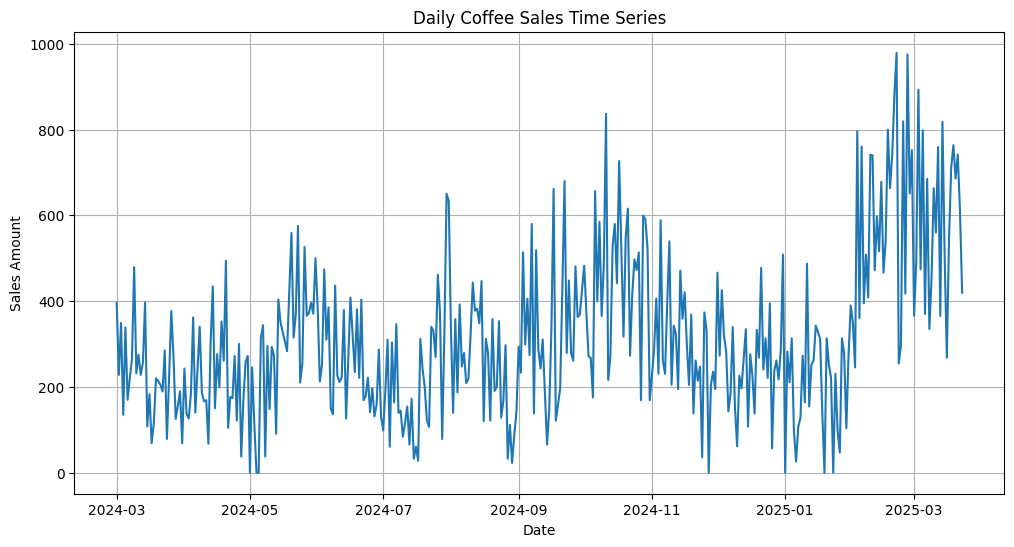

In [10]:
plt.figure(figsize=(12,6))
plt.plot(daily_sales)
plt.title("Daily Coffee Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.grid()
plt.show()

# Linear & Polynomial Trend

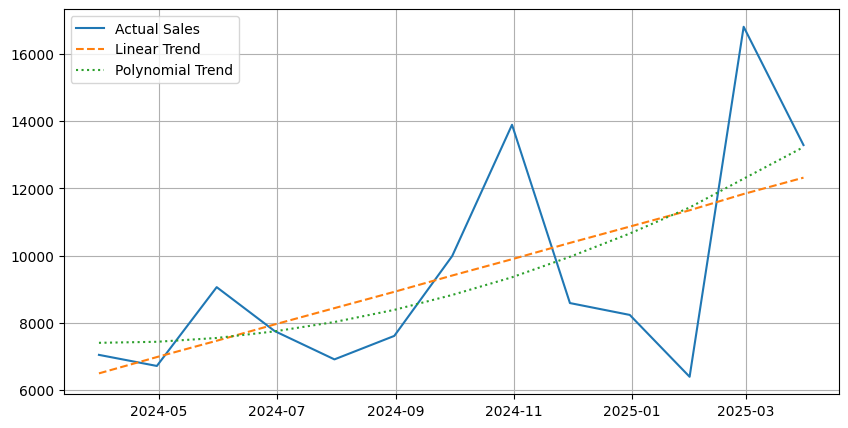

In [11]:
x = np.arange(len(monthly_sales))
linear = np.polyfit(x, monthly_sales, 1)
poly = np.polyfit(x, monthly_sales, 2)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales, label="Actual Sales")
plt.plot(monthly_sales.index, np.polyval(linear, x), '--', label="Linear Trend")
plt.plot(monthly_sales.index, np.polyval(poly, x), ':', label="Polynomial Trend")
plt.legend()
plt.grid()
plt.show()


# Time Series Decomposition

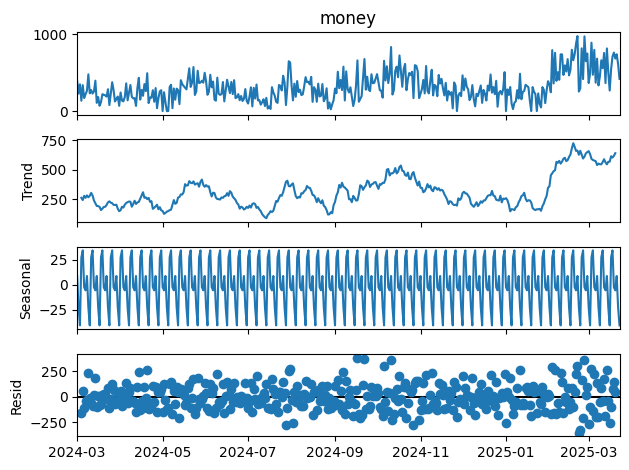

In [12]:
decomp = seasonal_decompose(daily_sales, model="additive", period=7)
decomp.plot()
plt.show()

# Stationarity Conversion

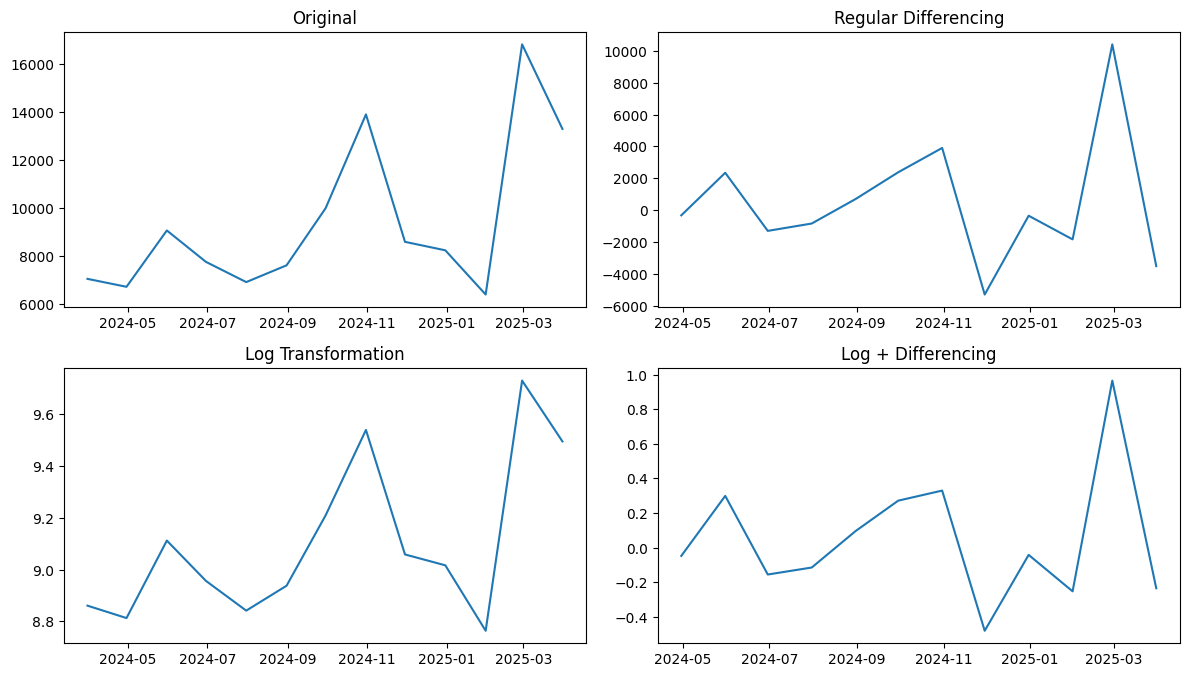

In [13]:
diff = monthly_sales.diff()
log = np.log(monthly_sales)
log_diff = log.diff()

plt.figure(figsize=(12,10))

plt.subplot(3,2,1)
plt.plot(monthly_sales); plt.title("Original")

plt.subplot(3,2,2)
plt.plot(diff); plt.title("Regular Differencing")

plt.subplot(3,2,3)
plt.plot(log); plt.title("Log Transformation")

plt.subplot(3,2,4)
plt.plot(log_diff); plt.title("Log + Differencing")

plt.tight_layout()
plt.show()

# ACF & PACF

<Figure size 1200x400 with 0 Axes>

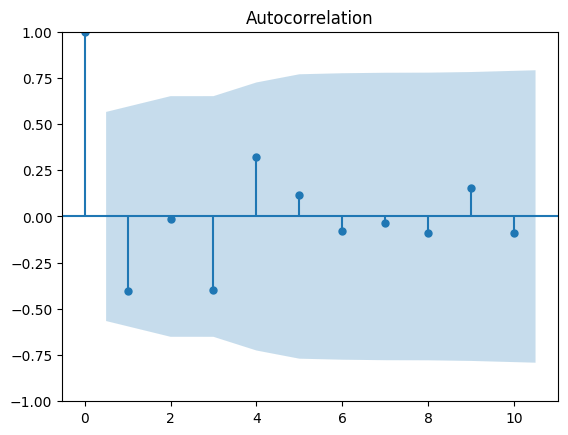

<Figure size 1200x400 with 0 Axes>

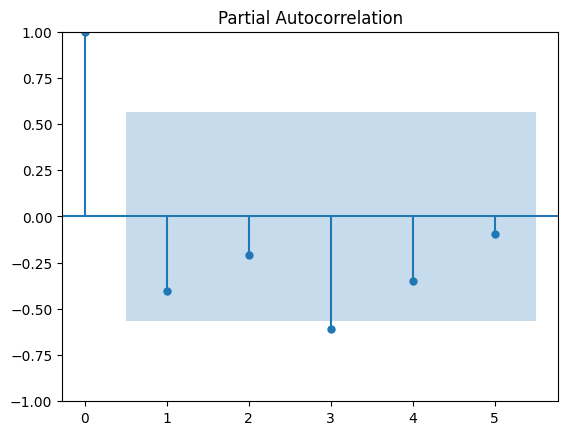

In [14]:
plt.figure(figsize=(12,4))
plot_acf(diff.dropna(), lags=10)
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(diff.dropna(), lags=5)
plt.show()

# Auto Regressive (AR) Model

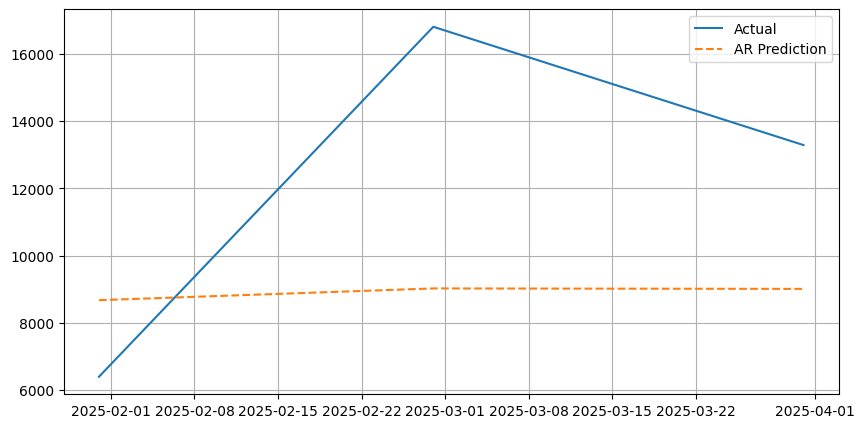


AR RMSE: 5290.941382947343


In [15]:
train = monthly_sales[:int(0.8*len(monthly_sales))]
test = monthly_sales[int(0.8*len(monthly_sales)):]

ar_model = AutoReg(train, lags=3).fit()
ar_pred = ar_model.predict(start=len(train), end=len(train)+len(test)-1)

plt.figure(figsize=(10,5))
plt.plot(test, label="Actual")
plt.plot(ar_pred, '--', label="AR Prediction")
plt.legend()
plt.grid()
plt.show()

ar_rmse = np.sqrt(mean_squared_error(test, ar_pred))
print("\nAR RMSE:", ar_rmse)

# Moving Average

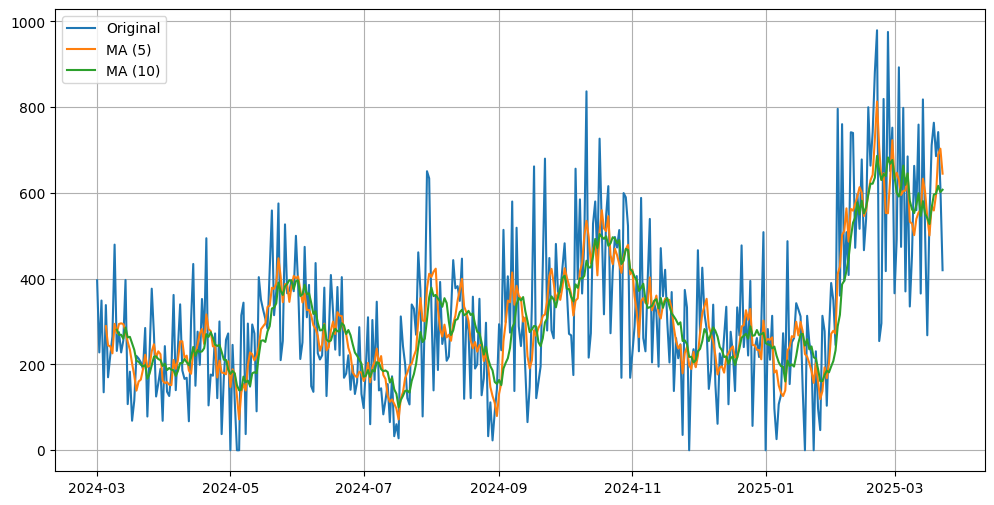

In [16]:
rolling_5 = daily_sales.rolling(5).mean()
rolling_10 = daily_sales.rolling(10).mean()

plt.figure(figsize=(12,6))
plt.plot(daily_sales, label="Original")
plt.plot(rolling_5, label="MA (5)")
plt.plot(rolling_10, label="MA (10)")
plt.legend()
plt.grid()
plt.show()

# Exponential Smoothing

In [17]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(monthly_sales.values.reshape(-1,1)).flatten()

train_s = scaled[:int(0.8*len(scaled))]
test_s = scaled[int(0.8*len(scaled)):]

es_model = ExponentialSmoothing(train_s, trend="add", seasonal="mul", seasonal_periods=3).fit()
es_pred = es_model.forecast(len(test_s))

es_rmse = np.sqrt(mean_squared_error(test_s, es_pred))
print("Exponential Smoothing RMSE:", es_rmse)

Exponential Smoothing RMSE: 0.5946134987963004


# Holt-Winters Method

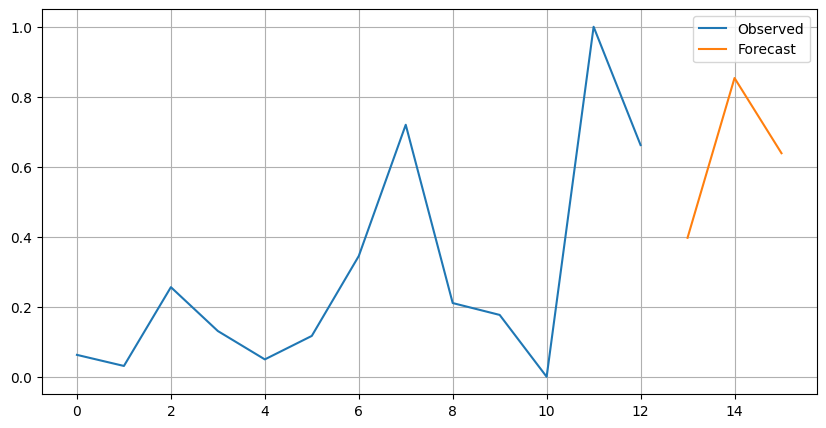

In [18]:
hw_model = ExponentialSmoothing(
    scaled + 1e-6,
    trend="add",
    seasonal="mul",
    seasonal_periods=3
).fit()

hw_forecast = hw_model.forecast(3)

plt.figure(figsize=(10,5))
plt.plot(scaled, label="Observed")
plt.plot(range(len(scaled), len(scaled)+3), hw_forecast, label="Forecast")
plt.legend()
plt.grid()
plt.show()

# ARIMA Model

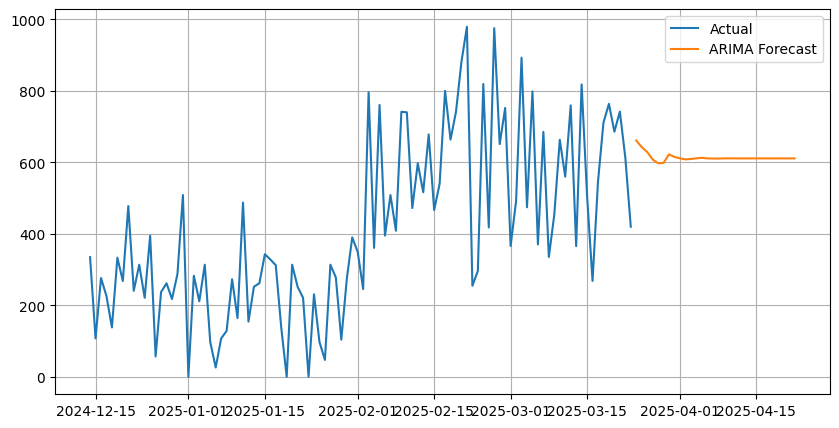


ARIMA RMSE: 204.1948338682501


In [19]:
arima = ARIMA(daily_sales, order=(5,1,0)).fit()
arima_forecast = arima.forecast(30)

plt.figure(figsize=(10,5))
plt.plot(daily_sales[-100:], label="Actual")
plt.plot(arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.grid()
plt.show()

arima_rmse = np.sqrt(mean_squared_error(daily_sales[-30:], arima_forecast))
print("\nARIMA RMSE:", arima_rmse)

# SARIMA Model

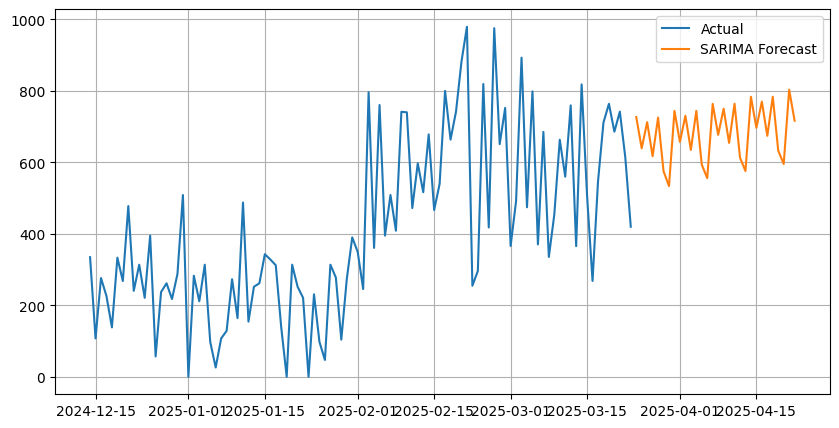


SARIMA RMSE: 233.0542406062789


In [20]:
sarima = SARIMAX(
    daily_sales,
    order=(1,1,1),
    seasonal_order=(1,1,1,7)
).fit()

sarima_forecast = sarima.forecast(30)

plt.figure(figsize=(10,5))
plt.plot(daily_sales[-100:], label="Actual")
plt.plot(sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.grid()
plt.show()

sarima_rmse = np.sqrt(mean_squared_error(daily_sales[-30:], sarima_forecast))
print("\nSARIMA RMSE:", sarima_rmse)

In [21]:
print("\nMODEL PERFORMANCE SUMMARY")
print("-------------------------")
print("AR RMSE:", ar_rmse)
print("Exponential Smoothing RMSE:", es_rmse)
print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)


MODEL PERFORMANCE SUMMARY
-------------------------
AR RMSE: 5290.941382947343
Exponential Smoothing RMSE: 0.5946134987963004
ARIMA RMSE: 204.1948338682501
SARIMA RMSE: 233.0542406062789
